# Proyecto Final de Estadística
# Análisis de las muertes en el Conflicto Israelí-Palestino desde el año 2000 hasta el 2023

### Equipo del C311
- Daniel Machado Pérez
- Daniel Toledo Martínez
- Osvaldo R. Moreno Prieto

![Mapa de Gaza, West Bank, Israel](israel-gaza-west-bank-map.jpg)

## Un poco de historia y contexto.

El Conflicto Israelí-Palestino es el conflicto social y armado en curso entre israelíes y palestinos por el control de la región histórica de Palestina, que se remonta a principios del siglo XX.

Los primeros asentamientos judíos en estas tierras comenzaron en 1881, pero el antisemitismo nazi provocó una gran oleada en 1930. Con el paso de los años las comunidades judías asentadas en la zona fueron creciendo y se dispararon los enfrentamientos. Tras la Segunda Guerra Mundial, el 29 de noviembre de 1947, Naciones Unidas, a petición de Reino Unido, dividió el territorio asignando el 54% a los judíos y el 46% a los palestinos y dejó Jerusalén, ciudad clave para los dos pueblos, bajo régimen internacional. En ese momento se crearon los territorios palestinos de Gaza y Cisjordania (West Bank).

Los judíos aceptaron el plan de partición, mientras que los árabes lo rechazaron. Estalló entonces una guerra civil en el mandato entre judíos y árabes que desencadenó la expulsión o huida de dos tercios de la población árabe. El 14 de mayo de 1948, coincidiendo con la declaración de independencia de Israel, los Estados árabes vecinos declararon la guerra al recién creado Estado de Israel, aunque finalmente fueron derrotados por los israelíes. A la conclusión de la guerra, Israel se negó a aceptar el retorno de los más de 700.000 refugiados palestinos, que han vivido desde entonces en campamentos de refugiados y ciudades de Líbano, Siria, Jordania, la Franja de Gaza y Cisjordania, entre otros lugares. Israel pasó a ocupar el 77% del territorio palestino. 

A partir de entonces, el conflicto ha sido una constante en la región, con enfrentamientos armados y atentados terroristas por parte de ambos bandos. En el presente trabajo se analizarán los datos de muertes en el conflicto desde el año 2000 hasta el 2023, con el objetivo de identificar patrones y tendencias en la evolución de las fatalidades. Contamos con un [Dataset de Kaggle](https://www.kaggle.com/datasets/willianoliveiragibin/fatalities-in-the-israeli-palestinian) que contiene información sobre cada una de las muertes desde el año 2000 hasta septiembre de 2023, incluyendo la fecha, el lugar, la causa, la ciudadanía, la edad y otros datos interesantes que estaremos analizando.

#### Descripción del dataset:
- name: Nombre de la persona fallecida.
- date_of_event: Fecha en la que ocurrió el evento que ocasionó la muerte.
- age: Edad de la persona fallecida.
- citizenship: Ciudadanía de la persona fallecida.
- event_location: Lugar donde ocurrió el evento que ocasionó la muerte.
- event_location_district: Distrito donde ocurrió el evento que ocasionó la muerte.
- event_location_region: Región donde ocurrió el evento que ocasionó la muerte.
- date_of_death: Fecha de la muerte. (No tiene por qué coincidir con la fecha del evento)
- gender: Sexo de la persona fallecida.
- took_part_in_the_hostilities: Si la persona fallecida participó formaba parte de las hostilidades o no.
- place_of_residence: Lugar de residencia de la persona fallecida.
- place_of_residence_district: Distrito de residencia de la persona fallecida.
- type_of_injury: Tipo de lesión que ocasionó la muerte.
- ammunition: Tipo de munición que ocasionó la muerte.
- killed_by: Quién ocasionó la muerte.
- notes: Notas adicionales.

In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import re

In [100]:
data_path = 'fatalities_isr_pse_conflict_2000_to_2023.csv'
df = pd.read_csv(data_path)

## Análisis Exploratorio de Datos

Cada fila de nuestro dataset es una muerte individual del conflicto, y contiene las siguientes columnas:

In [101]:
df.columns

Index(['name', 'date_of_event', 'age', 'citizenship', 'event_location',
       'event_location_district', 'event_location_region', 'date_of_death',
       'gender', 'took_part_in_the_hostilities', 'place_of_residence',
       'place_of_residence_district', 'type_of_injury', 'ammunition',
       'killed_by', 'notes', 'Unnamed: 16'],
      dtype='object')

Los datos están dispuestos de la sigueinte forma:

In [102]:
df.head()

,name,date_of_event,age,citizenship,event_location,event_location_district,event_location_region,date_of_death,gender,took_part_in_the_hostilities,place_of_residence,place_of_residence_district,type_of_injury,ammunition,killed_by,notes,Unnamed: 16
0,'Abd a-Rahman Suleiman Muhammad Abu Daghash,2023-09-24,32.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while standing ...,NaN
1,Usayed Farhan Muhammad 'Ali Abu 'Ali,2023-09-24,21.0,Palestinian,Nur Shams R.C.,Tulkarm,West Bank,2023-09-24,M,NaN,Nur Shams R.C.,Tulkarm,gunfire,live ammunition,Israeli security forces,Fatally shot by Israeli forces while trying to...,NaN
2,'Abdallah 'Imad Sa'ed Abu Hassan,2023-09-22,16.0,Palestinian,Kfar Dan,Jenin,West Bank,2023-09-22,M,NaN,al-Yamun,Jenin,gunfire,live ammunition,Israeli security forces,Fatally shot by soldiers while firing at them ...,NaN
3,Durgham Muhammad Yihya al-Akhras,2023-09-20,19.0,Palestinian,'Aqbat Jaber R.C.,Jericho,West Bank,2023-09-20,M,NaN,'Aqbat Jaber R.C.,Jericho,gunfire,live ammunition,Israeli security forces,Shot in the head by Israeli forces while throw...,NaN
4,Raafat 'Omar Ahmad Khamaisah,2023-09-19,15.0,Palestinian,Jenin R.C.,Jenin,West Bank,2023-09-19,M,NaN,Jenin,Jenin,gunfire,live ammunition,Israeli security forces,Wounded by soldiers’ gunfire after running awa...,NaN


A priori la única columna con valores numéricos es `age`

In [103]:
df.describe()

,age
count,10995.000000
mean,26.745703
std,13.780548
min,1.000000
25%,19.000000
50%,23.000000
75%,31.000000
max,112.000000


In [104]:
print(f"Nuestro dataset tiene las siguientes dimensiones: {df.shape}.")

Nuestro dataset tiene las siguientes dimensiones: (11124, 17).


Para saber la cantidad de valores no nulos de cada columna, el tipo de dato, etc:

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11124 entries, 0 to 11123
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          11124 non-null  object 
 1   date_of_event                 11124 non-null  object 
 2   age                           10995 non-null  float64
 3   citizenship                   11124 non-null  object 
 4   event_location                11124 non-null  object 
 5   event_location_district       11124 non-null  object 
 6   event_location_region         11124 non-null  object 
 7   date_of_death                 11124 non-null  object 
 8   gender                        11104 non-null  object 
 9   took_part_in_the_hostilities  9694 non-null   object 
 10  place_of_residence            11056 non-null  object 
 11  place_of_residence_district   11056 non-null  object 
 12  type_of_injury                10833 non-null  object 
 13  a

Para conocer la cantidad de datos diferentes en cada columna:

In [106]:
df.nunique()

name                            11083
date_of_event                    2405
age                                95
citizenship                         4
event_location                    494
event_location_district            20
event_location_region               3
date_of_death                    2593
gender                              2
took_part_in_the_hostilities        5
place_of_residence                580
place_of_residence_district        20
type_of_injury                     13
ammunition                         21
killed_by                           3
notes                            6742
Unnamed: 16                        16
dtype: int64

#### Ahora obtengamos algunas gráficas para visualizar entender algunos de los datos con los que vamos a trabajar.

In [107]:
import pandas as pd
import plotly.graph_objects as go

# Contar el número de muertes por nacionalidad
deaths_by_nationality = df['citizenship'].value_counts()

# Crear la gráfica de barras
fig = go.Figure(data=go.Bar(x=deaths_by_nationality.index, y=deaths_by_nationality.values, marker_color='red'))

# Añadir etiquetas y título
fig.update_layout(
    title_text='Muertes en el conflicto Israel-Palestino por nacionalidad',
    xaxis_title='Nacionalidad',
    yaxis_title='Cantidad de muertes',
    autosize=False,
    width=1100,
    height=600,
    margin=dict(l=50, r=50, b=100, t=100, pad=4)
)

# Mostrar la gráfica
fig.show()

Es evidente que el conflicto no ha sido parejo...

Veamos las proporciones más claramente.

In [108]:
import pandas as pd
import plotly.graph_objects as go

column_values = df['citizenship']

category_counts = column_values.value_counts()

fig = go.Figure(data=go.Pie(labels=category_counts.index, values=category_counts.values))

fig.update_layout(
    title_text='Muertes por nacionalidad',
    autosize=False,
    width=800,
    height=800,
    margin=dict(l=50, r=50, b=100, t=100, pad=4)
)

fig.show()

Como las muertes Jordanas y Norteamericanas representan outliers, haremos los análisis posteriores solo con los muertos palestinos o israelíes.

In [109]:
df_filtered = df[df['citizenship'].isin(['Palestinian', 'Israeli'])].copy()

#### Analicemos las muertes por sexo, de forma general y por nacionalidad.

In [110]:
import pandas as pd
import plotly.subplots as sp
import plotly.graph_objects as go

column_values_general = df_filtered['gender']
category_counts_general = column_values_general.value_counts()

df_palestinian = df_filtered[df_filtered['citizenship']=="Palestinian"].copy()
column_values_palestinian = df_palestinian['gender']
category_counts_palestinian = column_values_palestinian.value_counts()

df_israeli = df_filtered[df_filtered['citizenship']=="Israeli"].copy()
column_values_israeli = df_israeli['gender']
category_counts_israeli = column_values_israeli.value_counts()

fig = sp.make_subplots(rows=1, cols=3, subplot_titles=('Muertes por sexo', 'Muertes palestinas por sexo', 'Muertes israelíes por sexo'), specs=[[{'type':'pie'}, {'type':'pie'}, {'type':'pie'}]])

# Plotear el primer gráfico de pastel
fig.add_trace(go.Pie(labels=category_counts_general.index, values=category_counts_general.values), row=1, col=1)

# Plotear el segundo gráfico de pastel
fig.add_trace(go.Pie(labels=category_counts_palestinian.index, values=category_counts_palestinian.values), row=1, col=2)

# Plotear el tercer gráfico de pastel
fig.add_trace(go.Pie(labels=category_counts_israeli.index, values=category_counts_israeli.values), row=1, col=3)

fig.update_layout(height=400, width=900, title_text="Distribución de muertes por sexo y ciudadanía")
fig.show()

Como se observa, la proporción de muertes palestinas por sexo es bastante parecida a la general, donde las muertes masculinas representan cerca del 90%. Sin embargo, en el caso israelí la razón sigue dando a los hombres como los que más muertes aportan, pero por un margen menor.

#### Cantidad de mujeres fallecidas por nacionalidad

In [111]:

result = df_filtered[df_filtered['gender'] == 'F'].groupby('citizenship').size()
sorted_result = result.sort_values(ascending = False)
sorted_result.head()

citizenship
Palestinian    1091
Israeli         331
dtype: int64

#### Ahora visualicemos las proporciones de los datos recogidos en el dataset con otro tipo de gráfica.

Primero analicemos la columna `event_location`.

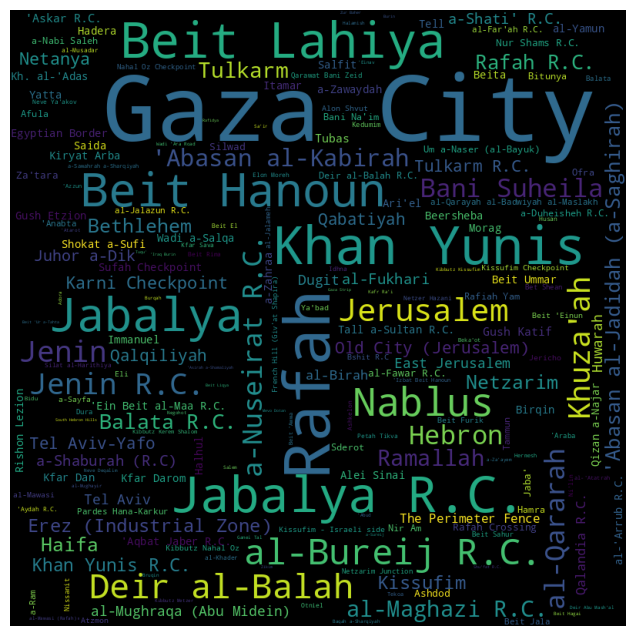

In [112]:
from wordcloud import WordCloud


deaths_by_region = df_filtered['event_location'].value_counts()
wordcloud = (WordCloud(width=800, height=800, background_color='black').
             generate_from_frequencies(deaths_by_region))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Se observa que Gaza City registra la mayor cantidad de muertos en una misma ciudad en los 24 años recogidos en el dataset. También destacan Rafah, Khan Yunis, Jabalya R.C., todas ubicaciones palestinas.

Veamos los tipos de lesiones más comunes en las muertes.

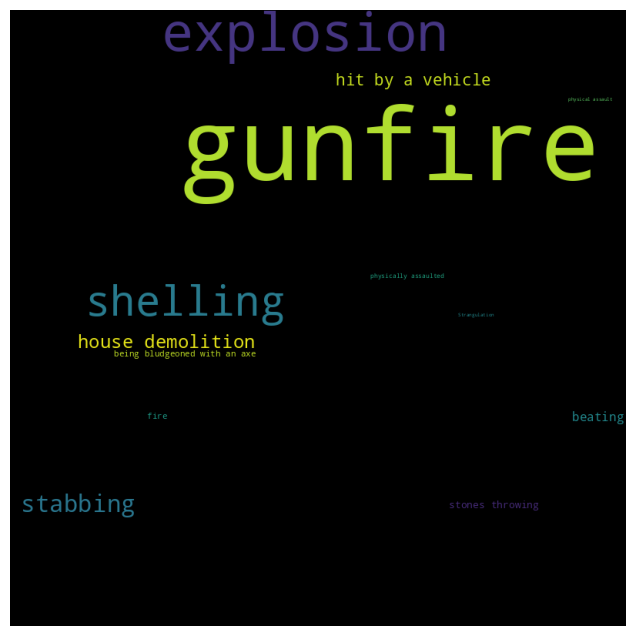

In [113]:
from wordcloud import WordCloud


deaths_by_type_of_injury = df_filtered['type_of_injury'].value_counts()
wordcloud = (WordCloud(width=800, height=800, background_color='black').
             generate_from_frequencies(deaths_by_type_of_injury))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Por amplio margen las lesiones por armas de fuego son las que más muertes provocan. Esto debería estar relacionado con el tipo de munición más usado.

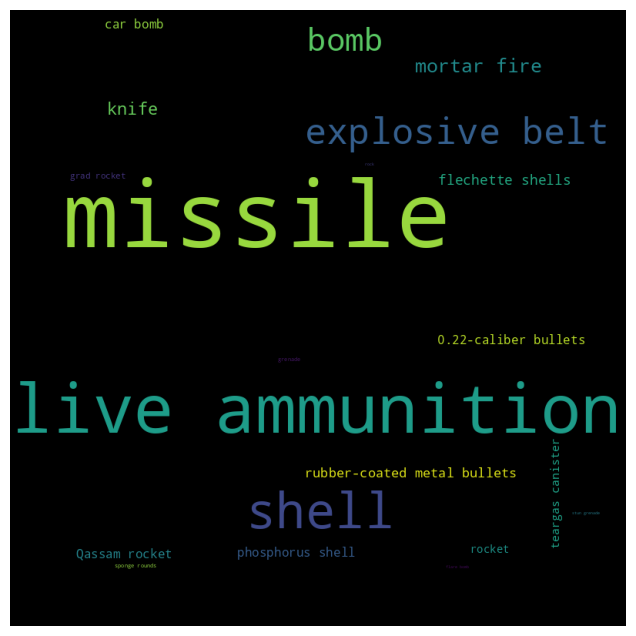

In [114]:
from wordcloud import WordCloud


deaths_by_ammunition = df_filtered['ammunition'].value_counts()
wordcloud = (WordCloud(width=800, height=800, background_color='black').
             generate_from_frequencies(deaths_by_ammunition))

plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Efectivamente, los más frecuentes son los misiles y los proyectiles. Debemos aclarar que en los datos se recoge que los misiles provocan lesiones de tipo arma de fuego.

#### Gráficos de barras para las variables categóricas 

In [115]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

bar_cols = ['took_part_in_the_hostilities', 'killed_by', 'type_of_injury', 'ammunition']

fig = make_subplots(rows=2, cols=2, subplot_titles=bar_cols)

for i in range(2):
    for j in range(2):
        counts = df_filtered[bar_cols[i*2 + j]].value_counts()
        fig.add_trace(go.Bar(y=counts.index, x=counts.values, orientation='h', name=bar_cols[i*2 + j]), row=i+1, col=j+1)

fig.update_layout(height=700, width=1000, title_text="Distribución de datos")
fig.show()

En el gráfico de la esquina superior izquierda observamos la cantidad de víctimas civiles del conflicto.

En el gráfico de la esquina superior derecha vemos que las Fuerzas de Seguridad Israelíes son las responsables de la amplia mayoría de las muertes, dato que está en correspondencia con que la mayor cantidad de fallecidos sean palestinos. 

En las otras dos gráficas vemos las proporciones de los datos de las columnas `type_of_injury` y `ammunition`

#### Analicemos si la proporción de muertos por nacionalidad siempre se inclina hacia un mismo bando o si sigue alguna progresión. 
Para ello, como primera aproximación veamos las gráficas de 3 años en particular, al inicio, a mediados y a finales del período estudiado.

In [116]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Convertir la columna 'date_of_event' a tipo datetime si aún no lo está
df_filtered['date_of_event'] = pd.to_datetime(df_filtered['date_of_event'])

counts_2000 = df_filtered.loc[df_filtered['date_of_event'].dt.year == 2000]['citizenship'].value_counts()
counts_2010 = df_filtered.loc[df_filtered['date_of_event'].dt.year == 2010]['citizenship'].value_counts()
counts_2022 = df_filtered.loc[df_filtered['date_of_event'].dt.year == 2022]['citizenship'].value_counts()

fig = make_subplots(rows=1, cols=3, subplot_titles=['Muertes en el 2000', 'Muertes en el 2010', 'Muertes en el 2022'], 
                    specs=[[{'type':'domain'}, {'type':'domain'}, {'type':'domain'}]])

# Crear un diccionario de colores
color_dict = {'Israeli': 'orange', 'Palestinian': 'blue'}

# Usar el diccionario de colores al trazar el gráfico de pastel
fig.add_trace(go.Pie(labels=counts_2000.index, values=counts_2000.values, marker_colors=[color_dict.get(n, 'grey') for n in counts_2000.index], rotation=-90), row=1, col=1)
fig.add_trace(go.Pie(labels=counts_2010.index, values=counts_2010.values, marker_colors=[color_dict.get(n, 'grey') for n in counts_2010.index], rotation=-90), row=1, col=2)
fig.add_trace(go.Pie(labels=counts_2022.index, values=counts_2022.values, marker_colors=[color_dict.get(n, 'grey') for n in counts_2022.index], rotation=-90), row=1, col=3)

fig.update_traces(textinfo='percent+label')
fig.update_layout(height=400, width=900)
fig.show()

Observemos que en el año 2000 la proporción de muertos por nacionalidad está invertida con respecto a los otros años mostrados. Investiguemos las posibles razones de este cambio.

In [117]:
counts_2000

citizenship
Israeli        29
Palestinian     6
Name: count, dtype: int64

#### Comienzo de la Segunda Intifada.

Intifada es el nombre popular de las rebeliones de los palestinos de Cisjordania y la Franja de Gaza contra Israel. La Primera Intifada tuvo lugar entre 1987 y 1993. 

La Segunda Intifada, que se ha dado en llamar Intifada de al-Aqsa, empezó en septiembre de 2000 como respuesta a la visita del político Ariel Sharón a la Explanada de las Mezquitas de Jerusalén. Este acto fue interpretado como una provocación por los palestinos, quienes reaccionaron arrojando piedras a las fuerzas israelíes. La represión tuvo como resultado 7 palestinos muertos, provocando así violentas insurrecciones a lo largo de la [Línea Verde](https://es.wikipedia.org/wiki/L%C3%ADnea_Verde_(Israel)). Fue terminada oficialmente el 24 de febrero de 2005.​ Esta segunda intifada dejó más de 5000 palestinos (en su mayoría civiles) y más de 1000 israelíes muertos. Además, la victoria de Israel significó el aislamiento definitivo de la Franja de Gaza. 

Fuente: [Wikipedia](https://es.wikipedia.org/wiki/Intifada)

Es decir, la causa más probable por la que en el 2000 se reportaron más muertes israelíes que palestinas es el inicio de la Segunda Intifada, pero rápidamente esta proporción se invirtió en los siguientes años.

#### Grafiquemos las muertes palestinas e israelíes por año.

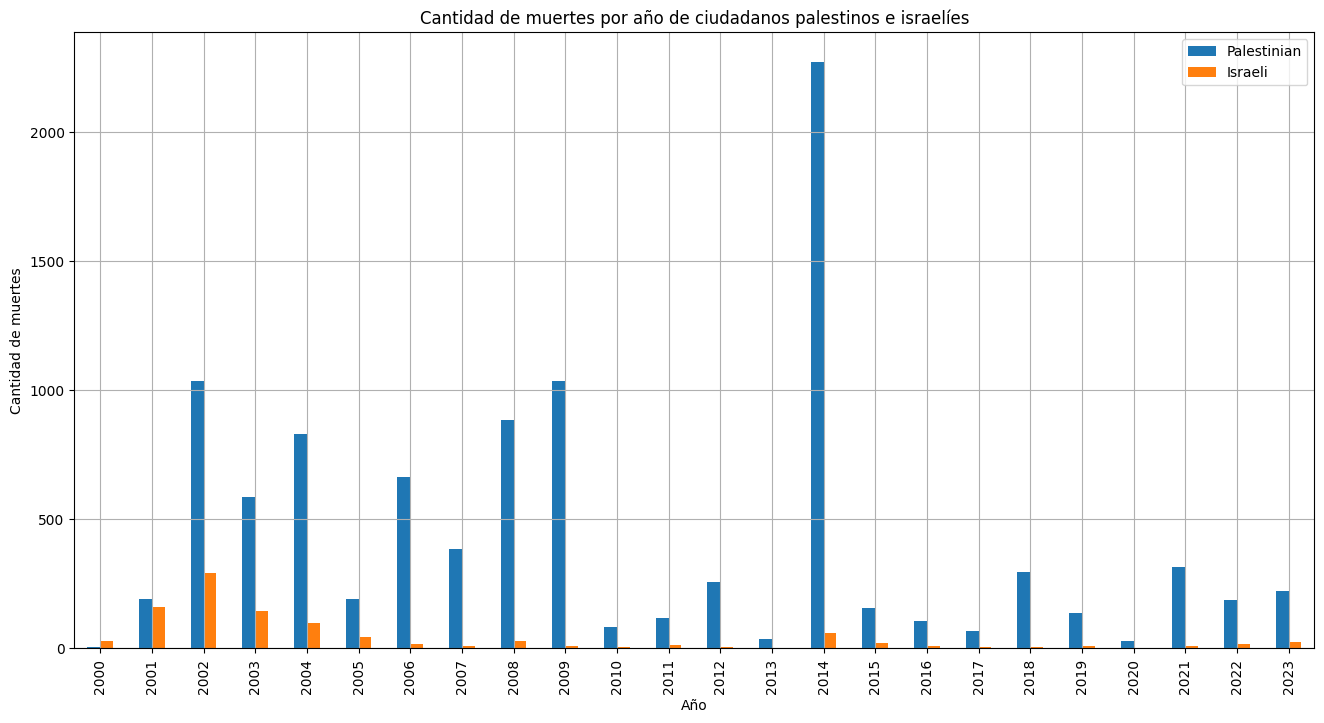

In [118]:
df_palestinian['date_of_event'] = pd.to_datetime(df_palestinian['date_of_event'])
df_israeli['date_of_event'] = pd.to_datetime(df_israeli['date_of_event'])


# Agrupar por año y contar la cantidad de muertes en cada año
palestinian_deaths_per_year = df_palestinian.groupby(df_palestinian['date_of_event'].dt.year).size()
israeli_deaths_per_year = df_israeli.groupby(df_israeli['date_of_event'].dt.year).size()

# Crear un nuevo DataFrame con los datos de muertes por año
df_deaths_per_year = pd.DataFrame({
    'Palestinian': palestinian_deaths_per_year,
    'Israeli': israeli_deaths_per_year
})

# Rellenar los valores NaN con 0
df_deaths_per_year = df_deaths_per_year.fillna(0)

# Graficar la cantidad de muertes por año
df_deaths_per_year.plot(kind='bar', figsize=(16, 8))
plt.title('Cantidad de muertes por año de ciudadanos palestinos e israelíes')
plt.xlabel('Año')
plt.ylabel('Cantidad de muertes')
plt.grid(True)
plt.legend()
plt.show()

Se observa claramente que en el período estudiado, el único año en el que hubo más muertes israelíes que palestinas fue el 2000. También es notable el pico de muertes palestinas en 2014. Investiguemos a qué puede deberse esto. 

#### Conflicto entre la Franja de Gaza e Israel de 2014

El conflicto entre la Franja de Gaza e Israelq, conocido como Operación Margen Protector,​ hizo referencia al conflicto bélico iniciado el 8 de julio de 2014, cuando las Fuerzas de Defensa de Israel (FDI) lanzaron la Operación Acantilado Poderoso​ sobre territorio gazatí, debido a una escalada de tensión en el conflicto israelí-palestino. Israel afirmó que el único objetivo de la operación era atacar al Movimiento de Resistencia Islámico (Hamás), la organización que gobierna la Franja tras ganar las elecciones en 2006, y terminar con los ataques de cohetes a Israel. El Estado de Palestina y diversas organizaciones por los derechos humanos acusaron a Israel de llevar a cabo un ataque indiscriminado contra todos los palestinos, ya que los ataques causaron la muerte principalmente de civiles. Por su parte, Hamás lanzó cohetes contra Israel en respuesta a los misiles disparados por la Fuerza Aérea Israelí hacia la Franja de Gaza. Este conflicto ha sido uno de los de mayor envergadura en la Franja de Gaza en todo el siglo XXI y en su historia reciente. 

Fuente: [Wikipedia](https://es.wikipedia.org/wiki/Conflicto_entre_la_Franja_de_Gaza_e_Israel_de_2014)

#### Grafiquemos la serie de tiempo de las muertes por día

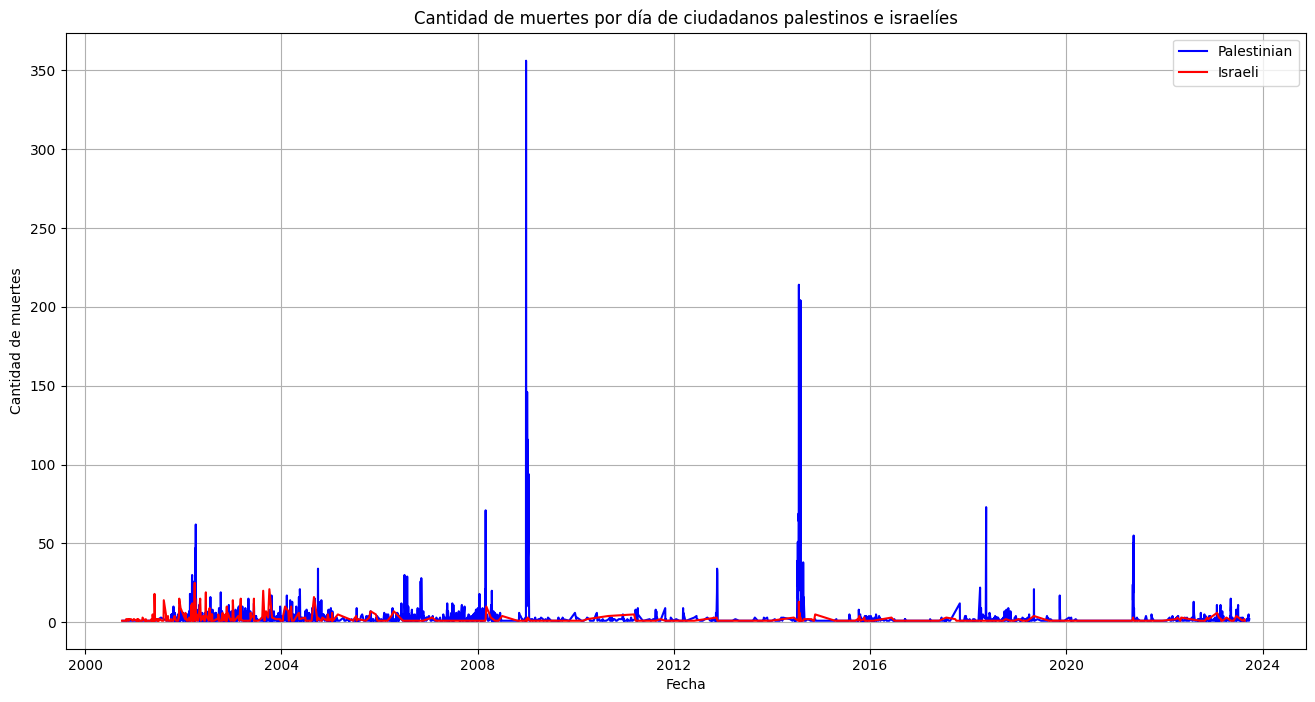

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para incluir solo las muertes de ciudadanos palestinos
df_palestinian = df_filtered[df_filtered['citizenship'] == 'Palestinian'].copy()

# Convertir la columna de fecha a formato datetime
df_palestinian['date_of_event'] = pd.to_datetime(df_palestinian['date_of_event'])

# Agrupar por día y contar la cantidad de muertes en cada día
palestinian_deaths_per_day = df_palestinian.groupby(df_palestinian['date_of_event'].dt.date).size()

# Filtrar los datos para incluir solo las muertes de ciudadanos israelíes
df_israeli = df_filtered[df_filtered['citizenship'] == 'Israeli'].copy()

# Convertir la columna de fecha a formato datetime
df_israeli['date_of_event'] = pd.to_datetime(df_israeli['date_of_event'])

# Agrupar por día y contar la cantidad de muertes en cada día
israeli_deaths_per_day = df_israeli.groupby(df_israeli['date_of_event'].dt.date).size()

# Graficar la cantidad de muertes por día
plt.figure(figsize=(16, 8))
palestinian_deaths_per_day.plot(kind='line', color='blue', label='Palestinian')
israeli_deaths_per_day.plot(kind='line', color='red', label='Israeli')
plt.title('Cantidad de muertes por día de ciudadanos palestinos e israelíes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de muertes')
plt.grid(True)
plt.legend()
plt.show()

Se observa una supremacía casi absoluta de las muertes palestinas por encima de las israelíes, con un pico destacado para las muertes palestinas entre 2008 y 2012.

In [120]:
# Encontrar el día con más muertes
max_deaths_day = palestinian_deaths_per_day.idxmax()

# Obtener la cantidad de muertes en el día con más muertes
max_deaths = palestinian_deaths_per_day[max_deaths_day]

print("El día con más muertes palestinas fue el", max_deaths_day, "con", max_deaths, "muertes.")

El día con más muertes palestinas fue el 2008-12-27 con 356 muertes.


#### Operación Plomo Fundido

El 27 de diciembre de 2008 las Fuerzas Armadas de Israel iniciaron un ataque aéreo contra la Franja de Gaza, considerado el más destructivo en 20 años y que causó, solo en las primeras horas, 230 muertos. Las ofensivas continuaron los días siguientes, aumentando el número de muertos, movilizándose tropas israelíes a la frontera con Gaza que fue declarada zona militar cerrada, asesinando a líderes de Hamás junto con sus familias, hasta que el 2 de enero de 2009 el Programa Mundial de Alimentos denunció que la situación en la franja de Gaza era “espantosa”. Al día siguiente, 3 de enero, las Fuerzas Armadas de Israel atacaron Gaza por tierra, mar y aire; la cifra de muertos se elevó a 500 y la de heridos, a 2300.

Fuente: [Argumentos. Revista de Análisis y Crítica](https://argumentos-historico.iep.org.pe/articulos/27-d-ataque-a-gaza/)

In [121]:
# Encontrar el día con más muertes
max_deaths_day = israeli_deaths_per_day.idxmax()

# Obtener la cantidad de muertes en el día con más muertes
max_deaths = israeli_deaths_per_day[max_deaths_day]

print("El día con más muertes israelíes fue el", max_deaths_day, "con", max_deaths, "muertes.")

El día con más muertes israelíes fue el 2002-03-27 con 25 muertes.


#### En medio de la Segunda Intifada

El 27 de marzo de 2002, un atentado suicida palestino mató a 30 civiles israelíes en un hotel de Netanya, lo que pasó a conocerse como la masacre de la Pascua Judía. Israel lanzó entonces una gran operación militar en toda Cisjordania, denominada Escudo Defensivo, que destruyó prácticamente por completo las infraestructuras y la administración pública palestinas.

Fuente: [Wikipedia](https://es.wikipedia.org/wiki/Hoja_de_Ruta_para_la_Paz)

#### Visualicemos los datos en histogramas de frecuencias.

In [122]:
import plotly.graph_objects as go

# Crear la traza para los datos palestinos
trace_palestinian = go.Bar(x=palestinian_hist_data.index, y=palestinian_hist_data.values, name='Palestinian')

# Crear el objeto de diseño
layout = go.Layout(
    title='Histograma de frecuencia de cantidad de muertes palestinas por día',
    xaxis=dict(title='Cantidad de muertes por día', type='log'),
    yaxis=dict(title='Frecuencia normalizada', type='log'),
)

# Crear la figura y añadir la traza
fig = go.Figure(data=[trace_palestinian], layout=layout)

# Mostrar la figura
fig.show()


In [123]:
import plotly.graph_objects as go

# Crear la traza para los datos israelíes
trace_israeli = go.Bar(x=israeli_hist_data.index, y=israeli_hist_data.values, name='Israeli')

# Crear el objeto de diseño
layout = go.Layout(
    title='Histograma de frecuencia de cantidad de muertes israelíes por día',
    xaxis=dict(title='Cantidad de muertes por día', type='log'),
    yaxis=dict(title='Frecuencia normalizada', type='log'),
)

# Crear la figura y añadir la traza
fig = go.Figure(data=[trace_israeli], layout=layout)

# Mostrar la figura
fig.show()

En ambos casos se observa una relación no lineal.

#### Analicemos los datos de las edades de las personas fallecidas.

In [124]:
import plotly.graph_objects as go

# Crear trazas para el gráfico de violín y el diagrama de caja
trace_violin = go.Violin(x=df['age'], name='Violin Plot', box_visible=True, meanline_visible=True)
trace_box = go.Box(x=df['age'], name='Box Plot', boxmean='sd')

# Crear el objeto de diseño
layout = go.Layout(
    title='Gráfica de Caja y Bigotes y de Violín de la característica "Edad"',
    xaxis=dict(title='Edad')
)

# Crear la figura y añadir las trazas
fig = go.Figure(data=[trace_violin, trace_box], layout=layout)

# Mostrar la figura
fig.show()


Existe una alta densidad de los datos alrededor de los 20 años y muchos outliers por encima de los 50 años.

Para eliminar los outliers de la columna `age` usamos el método del rango intercuartil (IQR).

In [125]:
# Calcular el IQR
Q1 = df_filtered['age'].quantile(0.25)
Q3 = df_filtered['age'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para los outliers
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Filtrar los outliers
df_filtered = df_filtered[(df_filtered['age'] >= lower_limit) & (df_filtered['age'] <= upper_limit)]

#### Distribución por grupos etáreos

<Axes: xlabel='Age_Group'>

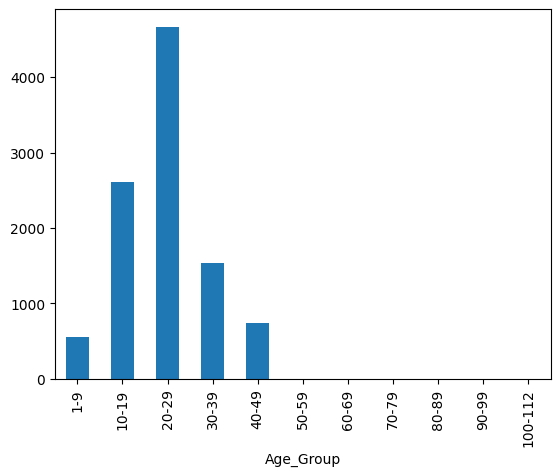

In [126]:
age_labels = ['1-9' ,'10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-112']
age_bins = [0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99, 112]
df_filtered.loc[:, 'Age_Group'] = pd.cut(df_filtered['age'], bins=age_bins, labels=age_labels)
age_groups = df_filtered["Age_Group"].value_counts()
age_groups.sort_index().plot(kind='bar')

In [127]:
age_groups['1-9']+age_groups['10-19']+age_groups['20-29']+age_groups['30-39']+age_groups['40-49']

10108

In [128]:
age_groups['20-29']

4663

## Prueba de Hipótesis

Vistos los datos de las muertes por grupos etáreos, nos parece razonable pensar que no existe la misma probabilidad de que una persona fallecida en el conflicto pertenezca a cualquiera de los grupos, pues en este tipo de enfrentamientos armados suelen morir más personas jóvenes (con edad de combatiente) que del resto de las edades. Es por ello que nos planteamos las siguientes hipótesis: 

$$ H_{0}: \text{La probabilidad de que la persona pertenezca a un rango etáreo sigue una distribución uniforme} $$

$$ H_{1}: \text{La probabilidad de que la persona pertenezca a un rango etáreo no sigue una distribución uniforme} $$

Tenemos los datos divididos en 5 grupos etáreos, pero por simplicidad calcularemos $ P(n_i) $ suponiendo que son 4 grupos, y luego generalizaremos para 5 grupos.

Donde $n_i$ es la cantidad de personas en el rango etáreo i
$$ n_1+n_2+n_3+n_4 = N$$

$$ P(n_1, n_2,n_3,n_4) = (\frac{1}{4})^{n_1+n_2+n_3+n_4}*\frac{(n_1+n_2+n_3+n_4)!}{n_1!n_2!n_3!n_4!}$$


$$ P(n_1) = \sum_{n_2,n_3,n_4} P(n_1, n_2,n_3,n_4) = \sum_{n_2=0}^{N-n_1}\sum_{n_3=0}^{N-n_1-n_2} P(n_1, n_2,n_3,n_4)$$

$$ P(n_1) = \sum_{n_2=0}^{N-n_1}(\frac{1}{4})^{N}\frac{N!}{n_1!n_2!(N-n_1-n_2)!}(N-n_1-n_2)!\sum_{n_3=0}^{N-n_1-n_2}\frac{1}{n_3!(N-n_1-n_2-n_3)!}$$

$$ P(n_1) = \sum_{n_2=0}^{N-n_1} (\frac{1}{4})^{N}\frac{N!}{n_1!n_2!(N-n_1-n_2)!}2^{N-n_1-n_2}$$

$$ P(n_1) = \sum_{n_2=0}^{N-n_1} (\frac{1}{4})^{N}\frac{N!}{n_1!(N-n_1)!}\frac{(N-n_1)!}{n_2!(N-n_1-n_2)!}2^{N-n_1-n_2}$$

$$ P(n_1) = (\frac{1}{4})^{N}{{N}\choose{n_1}} \sum_{n_2=0}^{N-n_1}{{N-n_1}\choose{n_2}}1^{n_2}2^{N-n_1-n_2}  $$

$$ P(n_1) = (\frac{1}{4})^{N}{{N}\choose{n_1}}3^{N-n_1} = (\frac{1}{4})^{n_1}{{N}\choose{n_1}}\frac{3^{N-n_1}}{4^{N-n_1}} $$

$$ P(n_1) = {{N}\choose{n_1}}(\frac{1}{4})^{n_1}(\frac{3}{4})^{N-n_1} $$

Por lo tanto calculamos $P(n_i)$ de la siguiente forma:
$$ P(n_i) = {{N}\choose{n_i}}p^{n_i}(1-p)^{N-n_i} $$

Donde $p$ es la probabilidad de que una persona pertenezca al rango etáreo $i$, y $N$ es el número total de personas. En el caso de 5 grupos etáreos, según nuestra Hipótesis nula, $p = \frac{1}{5}$

Teniendo esto, podemos suponer que el número de personas en cada rango etáreo se aproxima a:
 $$Np = \frac{N}{5} = E[n_i]$$

Tomemos el grupo etáreo 20-29 ($n_2$) que es donde se concentra la mayor cantidad de muertes en los datos, y calculemos la probabilidad de que haya $n_2$ o más muertes en ese grupo etáreo.

Tomemos en cuenta que en nuestros datos:
$$ N = 9587 $$
$$ n_2 = 4663  $$

Entonces calculemos:
$$ P(\overline{n_2}\gt 4663) = \sum_{n_2=4663}^{N}{{N}\choose{n_2}}p^{n_2}(1-p)^{N-n_2} $$

In [129]:
from scipy.stats import binom

# p = 1/5
p = 0.2
N = 9587
n2=4663

# Calcular la distribución acumulativa
cdf = binom.cdf(n2, N, p)

# Imprimir la distribución acumulativa
print("El p-value es: ", 1 - cdf)

cdf2 = binom.cdf(N*p, N, p)
print("Calculándolo para la media: ", 1-cdf2)

El p-value es:  0.0
Calculándolo para la media:  0.4979627312208801


Por lo tanto, como el $p-value$ es tan cercano a 0, se rechaza la Hipótesis nula.

#### Conclusiones
No existe la misma probabilidad de que una persona fallecida en el Conflicto Israelí-Palestino entre 2000 y 2023 pertenezca a cualquiera de los grupos etáreos analizados.

## Análisis de Correlación entre el promedio de edad y la cantidad de muertes.

Bajo el supuesto de que en un día con mayor cantidad de muertes, debería bajar el promedio de edad, puesto que se asume que la mayor cantidad de fallecidos son combatientes jóvenes, obtendremos el promedio de edad de todas las personas que fallecieron en días con igual cantidad de muertes. Luego hallaremos la correlación con la cantidad de muertes en un día.

La pendiente es: -0.0014676685451418894, y la intersección es: 23.59316212039107
La correlación entre la cantidad de muertes palestinas por día y el promedio de edades es: -0.008489124750153537


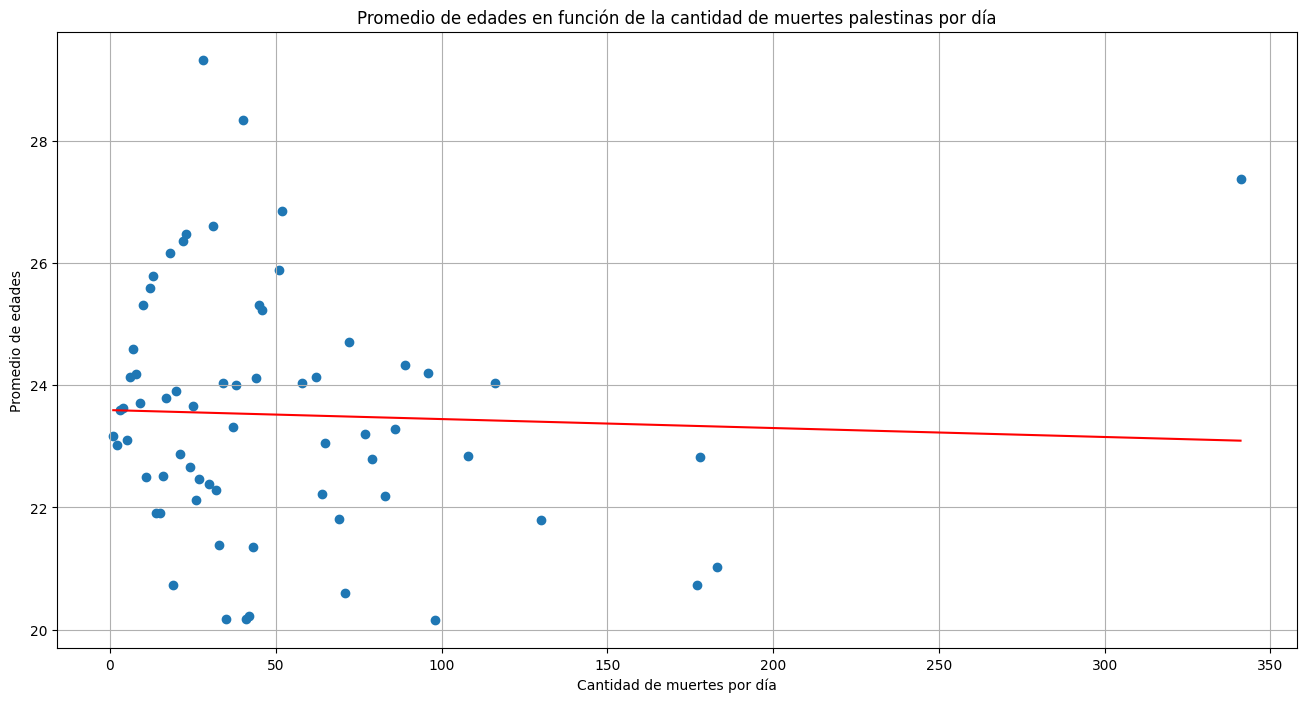

,age_sum,death_count,age_avg
death_count,,,
1,23657.0,1021,23.170421
2,19432.0,844,23.023697
3,14789.0,627,23.586922
4,12003.0,508,23.627953
5,10741.0,465,23.098925
...,...,...,...
130,2834.0,130,21.800000
177,3669.0,177,20.728814
178,4064.0,178,22.831461


In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para incluir solo las muertes de ciudadanos palestinos
df_palestinian_without_outliers = df_filtered[df_filtered['citizenship'] == 'Palestinian'].copy()

# Convertir la columna de fecha a formato datetime
df_palestinian_without_outliers['date_of_event'] = pd.to_datetime(df_palestinian_without_outliers['date_of_event'])

# Agrupar por fecha y calcular la suma de 'age' y el tamaño para cada grupo
grouped_by_date = df_palestinian_without_outliers.groupby(df_palestinian_without_outliers['date_of_event'].dt.date).agg({'age': ['sum', 'size']})

# Crear un nuevo DataFrame con 'date_of_event' como índice y 'age_sum' y 'death_count' como columnas
df_grouped = pd.DataFrame({'age_sum': grouped_by_date['age']['sum'], 'death_count': grouped_by_date['age']['size']})

# Agrupar por 'death_count' y calcular la suma total de 'age_sum' y el tamaño total para cada grupo
grouped_by_death_count = df_grouped.groupby('death_count').agg({'age_sum': 'sum', 'death_count': 'sum'})

# Calcular el promedio de las edades para cada grupo de 'death_count'
grouped_by_death_count['age_avg'] = grouped_by_death_count['age_sum'] / grouped_by_death_count['death_count']


# Realizar un ajuste lineal
slope, intercept = np.polyfit(grouped_by_death_count.index, grouped_by_death_count['age_avg'], 1)

# Imprimir la pendiente y la intersección
print(f"La pendiente es: {slope}, y la intersección es: {intercept}")

# Calcular la correlación entre 'death_count' y 'age_avg'
correlation = grouped_by_death_count['death_count'].corr(grouped_by_death_count['age_avg'])

print(f"La correlación entre la cantidad de muertes palestinas por día y el promedio de edades es: {correlation}")

# Graficar los datos y la línea de ajuste
plt.figure(figsize=(16, 8))
plt.scatter(grouped_by_death_count.index, grouped_by_death_count['age_avg'])
plt.plot(grouped_by_death_count.index, slope*grouped_by_death_count.index + intercept, color='red')  # línea de ajuste
plt.title('Promedio de edades en función de la cantidad de muertes palestinas por día')
plt.xlabel('Cantidad de muertes por día')
plt.ylabel('Promedio de edades')
plt.grid(True)
plt.show()

grouped_by_death_count


Haciendo un ajuste lineal a los datos se obtuvo una recta con pendiente casi 0, lo cual coincide con la baja correlación obtenida, dato que juega en contra de la suposición hecha.

La pendiente es: -0.5786799825724281, y la intersección es: 30.559263101252462
La correlación entre la cantidad de muertes israelíes por día y el promedio de edades es: 0.30089837873716235


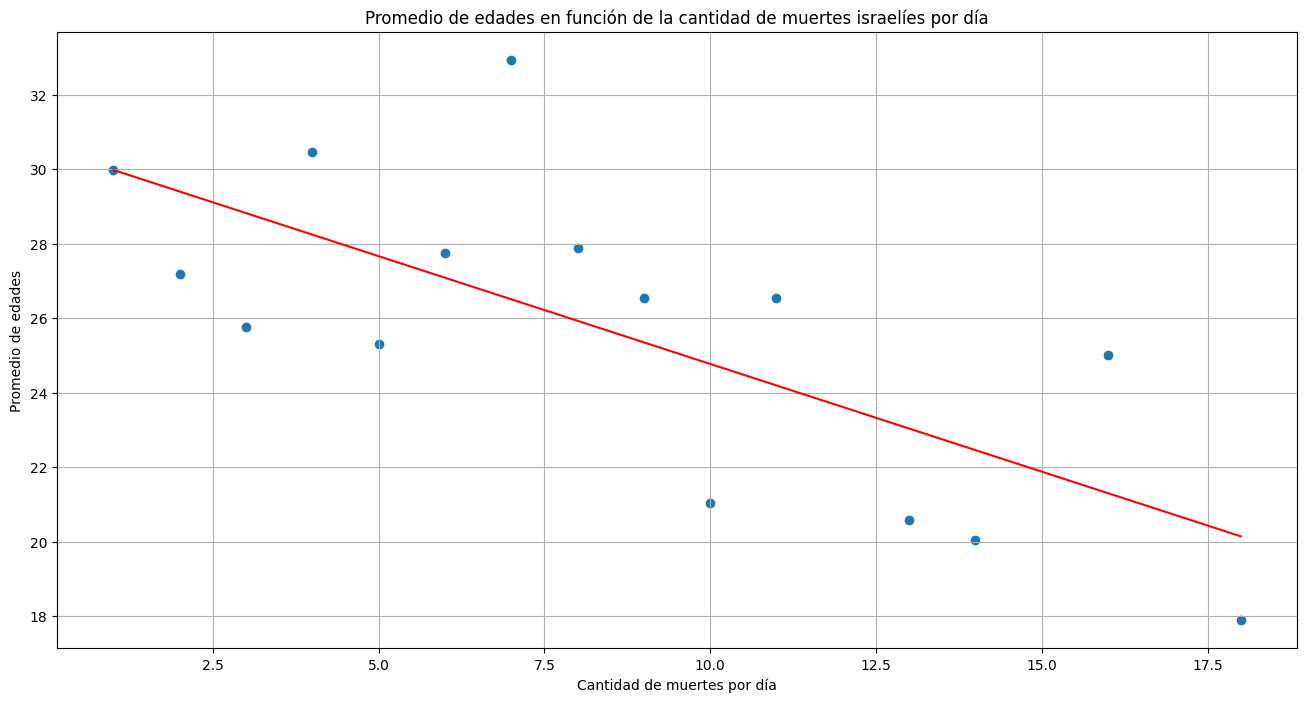

,age_sum,death_count,age_avg
death_count,,,
1,5368.0,179,29.988827
2,3100.0,114,27.192982
3,2936.0,114,25.754386
4,1706.0,56,30.464286
5,1898.0,75,25.306667
6,666.0,24,27.750000
7,461.0,14,32.928571
8,892.0,32,27.875000
9,478.0,18,26.555556


In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar los datos para incluir solo las muertes de ciudadanos palestinos
df_israeli_without_outliers = df_filtered[df_filtered['citizenship'] == 'Israeli'].copy()

# Convertir la columna de fecha a formato datetime
df_israeli_without_outliers['date_of_event'] = pd.to_datetime(df_israeli_without_outliers['date_of_event'])

# Agrupar por fecha y calcular la suma de 'age' y el tamaño para cada grupo
grouped_by_date = df_israeli_without_outliers.groupby(df_israeli_without_outliers['date_of_event'].dt.date).agg({'age': ['sum', 'size']})

# Crear un nuevo DataFrame con 'date_of_event' como índice y 'age_sum' y 'death_count' como columnas
df_grouped = pd.DataFrame({'age_sum': grouped_by_date['age']['sum'], 'death_count': grouped_by_date['age']['size']})

# Agrupar por 'death_count' y calcular la suma total de 'age_sum' y el tamaño total para cada grupo
grouped_by_death_count = df_grouped.groupby('death_count').agg({'age_sum': 'sum', 'death_count': 'sum'})

# Calcular el promedio de las edades para cada grupo de 'death_count'
grouped_by_death_count['age_avg'] = grouped_by_death_count['age_sum'] / grouped_by_death_count['death_count']


# Realizar un ajuste lineal
slope, intercept = np.polyfit(grouped_by_death_count.index, grouped_by_death_count['age_avg'], 1)

# Imprimir la pendiente y la intersección
print(f"La pendiente es: {slope}, y la intersección es: {intercept}")

# Calcular la correlación entre 'death_count' y 'age_avg'
correlation = grouped_by_death_count['death_count'].corr(grouped_by_death_count['age_avg'])

print(f"La correlación entre la cantidad de muertes israelíes por día y el promedio de edades es: {correlation}")

# Graficar los datos y la línea de ajuste
plt.figure(figsize=(16, 8))
plt.scatter(grouped_by_death_count.index, grouped_by_death_count['age_avg'])
plt.plot(grouped_by_death_count.index, slope*grouped_by_death_count.index + intercept, color='red')  # línea de ajuste
plt.title('Promedio de edades en función de la cantidad de muertes israelíes por día')
plt.xlabel('Cantidad de muertes por día')
plt.ylabel('Promedio de edades')
plt.grid(True)
plt.show()


grouped_by_death_count


Después de un análisis análogo para el caso de los israelíes, se obtiene mayor correlación. 

## Análisis de correlación entre la cantidad de muertes y el tipo de lesión provocada

#### Para llevar a cabo este análisis tenemos que cuantificar los datos de la columna `type_of_injury`. 
Para ello asigaremos un número para cada uno de los tipos de lesiones diferentes que aparecen en la data.

In [132]:
from sklearn.preprocessing import LabelEncoder

# Crear un objeto LabelEncoder
le = LabelEncoder()

# Ajustar y transformar la columna 'type_of_injury'
df_filtered['type_of_injury_encoded'] = le.fit_transform(df_filtered['type_of_injury'])
df_israeli = df_filtered[df_filtered['citizenship'] == 'Israeli'].copy()
df_israeli['type_of_injury_encoded'] = le.fit_transform(df_israeli['type_of_injury'])
df_palestinian = df_filtered[df_filtered['citizenship'] == 'Palestinian'].copy()
df_palestinian['type_of_injury_encoded'] = le.fit_transform(df_palestinian['type_of_injury'])

In [133]:
# Crear un dataframe para mapear 'type_of_injury' a 'type_of_injury_encoded'
mapping = pd.DataFrame({
    'type_of_injury': le.classes_,
    'type_of_injury_encoded': le.transform(le.classes_)
})

# Imprimir el mapeo
mapping

,type_of_injury,type_of_injury_encoded
0,beating,0
1,explosion,1
2,fire,2
3,gunfire,3
4,hit by a vehicle,4
5,house demolition,5
6,shelling,6
7,stabbing,7
8,stones throwing,8
9,NaN,9


#### Veamos si el número de muertes está correlacionado con los tipos de lesión: Fuego, Explosión, Bombardeo, Demolición. 
Con ese objetivo calcularemos el porciento que representan las muertes provocadas por ese tipo de lesión del total de muertes en un mismo día.

-0.14837270814155035
La pendiente es: -0.004519514459620704, y la intersección es: 0.7013464707125755


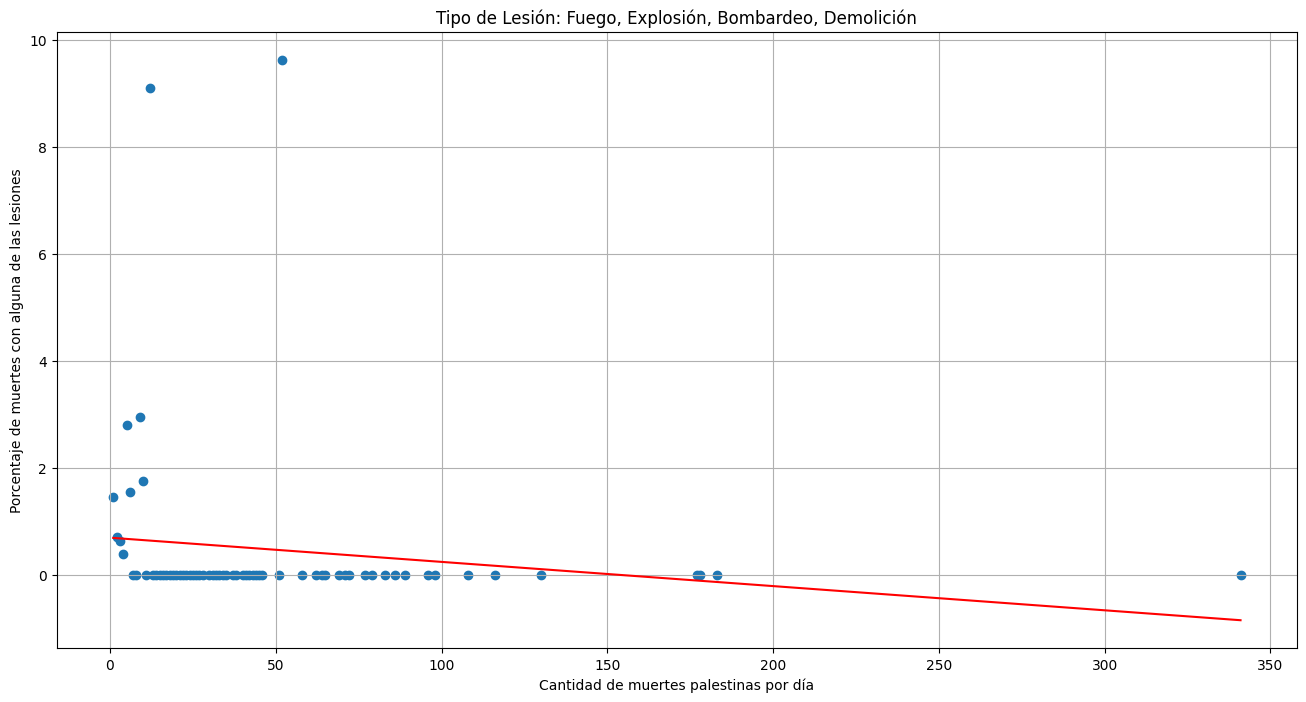

,num_deaths,percentage_injury_1_2_5_7
0,1,1.469148
1,2,0.710900
2,3,0.637959
3,4,0.393701
4,5,2.795699
...,...,...
61,130,0.000000
62,177,0.000000
63,178,0.000000
64,183,0.000000


In [134]:
import numpy as np

# Calcular el número total de muertes y el número de muertes con 'type_of_injury_encoded' igual a 10 o 3 para cada día
df_grouped = df_palestinian.groupby('date_of_event').agg(
    num_deaths=pd.NamedAgg(column='type_of_injury_encoded', aggfunc='count'),
    num_deaths_with_injury_1_2_5_7=pd.NamedAgg(column='type_of_injury_encoded', aggfunc=lambda x: ((x == 1) | (x == 2) | (x==5)| (x==7)).sum())
).reset_index()

# Calcular el porcentaje de muertes con 'type_of_injury_encoded' igual a 10 o 3
df_grouped['percentage_injury_1_2_5_7'] = (df_grouped['num_deaths_with_injury_1_2_5_7'] / df_grouped['num_deaths']) * 100

# Agrupar por 'num_deaths' y obtener el porcentaje promedio de muertes con 'type_of_injury_encoded' igual a 10 o 3
df_final = df_grouped.groupby('num_deaths').agg(
    percentage_injury_1_2_5_7=pd.NamedAgg(column='percentage_injury_1_2_5_7', aggfunc='mean')
).reset_index()

# Calcular la correlación
correlation = df_final['num_deaths'].corr(df_final['percentage_injury_1_2_5_7'])

# Imprimir la correlación
print(correlation)


# Realizar un ajuste lineal
slope, intercept = np.polyfit(df_final['num_deaths'], df_final['percentage_injury_1_2_5_7'], 1)

# Imprimir la pendiente y la intersección
print(f"La pendiente es: {slope}, y la intersección es: {intercept}")

# Graficar los datos y la línea de ajuste
plt.figure(figsize=(16, 8))
plt.scatter(df_final['num_deaths'], df_final['percentage_injury_1_2_5_7'])
plt.plot(df_final['num_deaths'], slope*df_final['num_deaths'] + intercept, color='red')  # línea de ajuste
plt.title('Tipo de Lesión: Fuego, Explosión, Bombardeo, Demolición')
plt.xlabel('Cantidad de muertes palestinas por día')
plt.ylabel('Porcentaje de muertes con alguna de las lesiones')
plt.grid(True)
plt.show()

# Imprimir el dataframe final
df_final

Baja correlación

La correlación es: 0.7090600529675497
La pendiente es: 4.048220728951999, y la intersección es: 38.411413837647


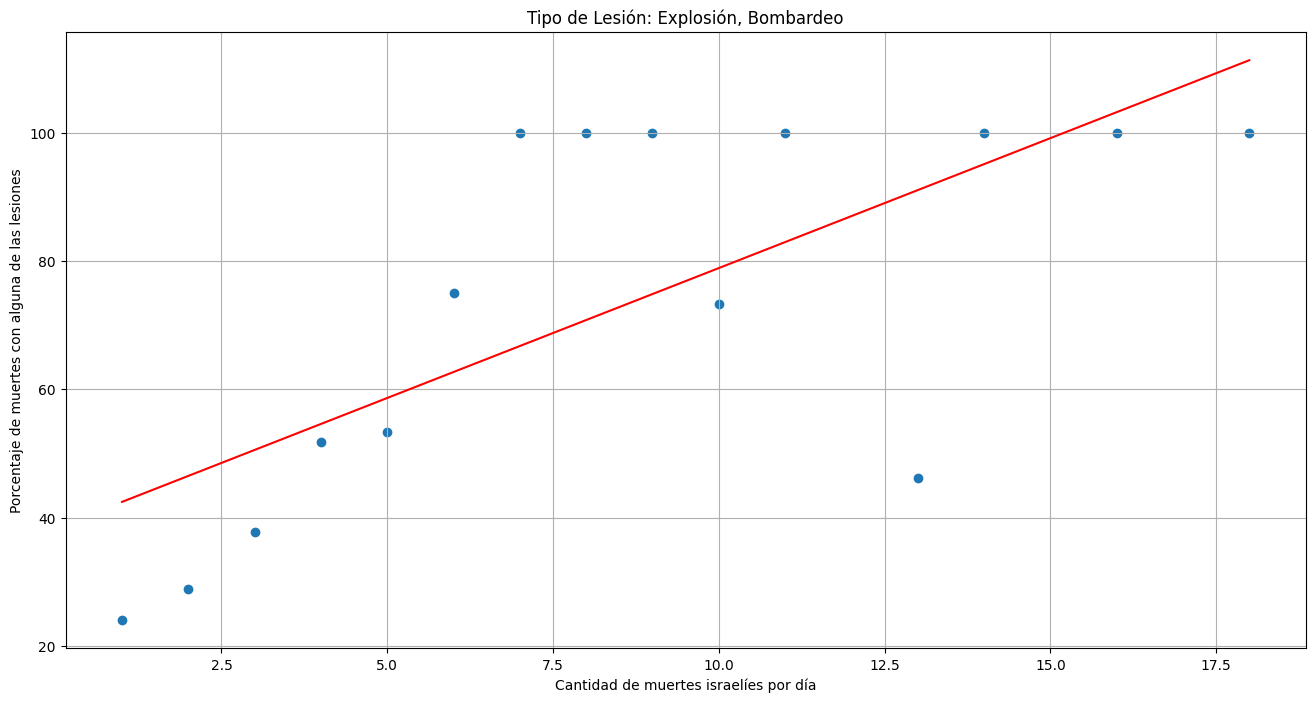

,num_deaths,percentage_injury_6_3
0,1,24.022346
1,2,28.947368
2,3,37.719298
3,4,51.785714
4,5,53.333333
5,6,75.000000
6,7,100.000000
7,8,100.000000
8,9,100.000000
9,10,73.333333


In [135]:
import numpy as np

df_grouped = df_israeli.groupby('date_of_event').agg(
    num_deaths=pd.NamedAgg(column='type_of_injury_encoded', aggfunc='count'),
    num_deaths_with_injury_6_3=pd.NamedAgg(column='type_of_injury_encoded', aggfunc=lambda x: ((x == 6) | (x == 3)).sum())
).reset_index()

df_grouped['percentage_injury_6_3'] = (df_grouped['num_deaths_with_injury_6_3'] / df_grouped['num_deaths']) * 100

df_final = df_grouped.groupby('num_deaths').agg(
    percentage_injury_6_3=pd.NamedAgg(column='percentage_injury_6_3', aggfunc='mean')
).reset_index()

# Calcular la correlación
correlation = df_final['num_deaths'].corr(df_final['percentage_injury_6_3'])

# Imprimir la correlación
print(f"La correlación es: {correlation}")

# Realizar un ajuste lineal
slope, intercept = np.polyfit(df_final['num_deaths'], df_final['percentage_injury_6_3'], 1)

# Imprimir la pendiente y la intersección
print(f"La pendiente es: {slope}, y la intersección es: {intercept}")

# Graficar los datos y la línea de ajuste
plt.figure(figsize=(16, 8))
plt.scatter(df_final['num_deaths'], df_final['percentage_injury_6_3'])
plt.plot(df_final['num_deaths'], slope*df_final['num_deaths'] + intercept, color='red') 
plt.title('Tipo de Lesión: Explosión, Bombardeo')
plt.xlabel('Cantidad de muertes israelíes por día')
plt.ylabel('Porcentaje de muertes con alguna de las lesiones')
plt.grid(True)
plt.show()

df_final

Como se puede observar se obtiene una correlación un poco más alta entre las muertes provocadas por los tipos de lesiones analizados (Explosión, Bombardeo) y la cantidad de israelíes muertos en un mismo día. 

#### Cuantificar los datos cualitativos para analizar correlación entre las columnas.

In [136]:
from sklearn.preprocessing import LabelEncoder

# Lista de columnas a codificar
columns_to_encode = ['citizenship', 'event_location_district', 'gender', 'took_part_in_the_hostilities', 'place_of_residence_district', 'type_of_injury', 'ammunition', 'killed_by']

# Diccionario para almacenar los codificadores para cada columna
encoders = {}

for column in columns_to_encode:
    le = LabelEncoder()
    df_filtered[column + '_encoded'] = le.fit_transform(df_filtered[column])
    encoders[column] = le

# Imprimir los mapeos para cada columna
for column, encoder in encoders.items():
    mapping = pd.DataFrame({
        column: encoder.classes_,
        column + '_encoded': encoder.transform(encoder.classes_)
    })
    print(f"\nMapping for {column}:")
    print(mapping)


Mapping for citizenship:
   citizenship  citizenship_encoded
0      Israeli                    0
1  Palestinian                    1

Mapping for event_location_district:
   event_location_district  event_location_district_encoded
0                Bethlehem                                0
1            Deir al-Balah                                1
2           East Jerusalem                                2
3                     Gaza                                3
4               Gaza Strip                                4
5               Gush Katif                                5
6                   Hebron                                6
7                   Israel                                7
8                    Jenin                                8
9                  Jericho                                9
10              Khan Yunis                               10
11                  Nablus                               11
12              North Gaza                      

#### Correlación entre columnas

In [137]:
import plotly.figure_factory as ff

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Crear un mapa de calor de la matriz de correlación
heatmap = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    annotation_text=corr_matrix.round(2).values,
    colorscale='RdBu',
    showscale=True,
    reversescale=True
)

# Mostrar el gráfico
heatmap.show()

#### Posibles interpretaciones:
- Entre `type_of_injury` y `citizenship` hay una ligera correlación positiva, posiblemente porque como hemos comprobado anteriormente, existen tipos de lesiones que provocan muertes solo en palestinos. Lo mismo ocurre entre `type_of_injury` y `ammunition`, y `type_of_injury` y `killed_by`, pues las Fuerzas de Seguridad Israelíes provocan muertes palestinas por lesiones de tipos distintos a las provocadas a los israelíes por Civiles Palestinos.
-  Entre `citizenship` y `took_part_in_the_hostilities` existe una correlación positiva pequeña, que puede estar dada por la cantidad de muertos civiles del lado palestino. La correlación entre `citizenship` y `ammunition` puede tener una explicación similar a la que ofrecimos entre `type_of_injury` y `citizenship`. Es evidente por qué existe una alta correlación negativa entre `citizenship` y `killed_by`.
-  Entre  `event_location_district` y `place_of_residence_district` hay una correlación positiva alta, lo cual resulta evidente.
-  Entre `gender` y `took_part_in_the_hostilities` se observa una interesante correlación. Una posible explicación es que las mujeres fallecidas por lo general no participaban en las hostilidades.

## Regresión Lineal

Habiendo analizado previamente la correlación lineal entre el porcentaje de muertes israelíes por lesiones de tipo Explosión o Bombardeo y la cantidad de muertes al día, nos parece interesante conocer si al incluir otras variables podemos encontrar un modelo de Regresión Lineal que nos ayude a predecir mejor la proporción de muertes provocadas por lesiones de tipo Explosión.

#### Variable dependiente: Porcentaje de muertes israelíes por lesión de tipo: Explosión
#### Variables independientes al inicio:
- Cantidad de muertes israelíes al día.
- Edad promedio de los israelíes fallecidos en el día.
- Porcentaje de muertes israelíes provocadas por el tipo de munición Bomba en el día.
- Porcentaje de muertes israelíes masculinas en el día.
- Porcentaje de muertes israelíes en la zona del West Bank en el día.

Primero se ajusta un modelo de regresión lineal con todas las variables independientes, y luego se va eliminando una a una las variables que no aportan significativamente al modelo.

Obtengamos los datos que necesitamos del dataset.

In [138]:
# Convertir la columna de fecha a formato datetime
df_israeli['date_of_event'] = pd.to_datetime(df_israeli['date_of_event'])

# Agrupar por fecha y calcular las columnas requeridas
df_israeli_grouped = df_israeli.groupby(df_israeli['date_of_event'].dt.date).agg({
    'date_of_event': 'size',  # cantidad de muertes en el día
    'age': 'mean',  # promedio de age
    'type_of_injury': lambda x: (x == 'explosion').mean() * 100,  # porciento de type_of_injury de tipo "Explosion"
    'ammunition': lambda x: (x == 'bomb').mean() * 100,  # porciento de ammunition de tipo "bomb"
    'gender': lambda x: (x == 'M').mean() * 100,  # porciento de gender de tipo M
    'event_location_region': lambda x: (x == 'West Bank').mean() * 100  # porciento de event_location_region de tipo "West Bank"
})

# Renombrar las columnas
df_israeli_grouped.columns = [
    'deaths', 
    'average_age', 
    'percentage_explosion_injuries', 
    'percentage_bomb_ammunition', 
    'percentage_male', 
    'percentage_west_bank'
]

Veamos qué correlación tienen las columnas que construimos

In [139]:
import plotly.figure_factory as ff

# Calcular la matriz de correlación
corr_matrix = df_israeli_grouped.corr()

# Crear un mapa de calor de la matriz de correlación
heatmap = ff.create_annotated_heatmap(
    z=corr_matrix.values,
    x=list(corr_matrix.columns),
    y=list(corr_matrix.index),
    annotation_text=corr_matrix.round(2).values,
    colorscale='RdBu',
    showscale=True,
    reversescale=True
)

# Mostrar el gráfico
heatmap.show()

Variebles correlacionadas con `percentage_explosion_injuries`:
- `deaths`
- `percentage_bomb_ammunition`
- `percentage_west_bank`

Ahora comencemos con la Regresión.

In [140]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = df_israeli_grouped[['deaths', 'percentage_bomb_ammunition', 'average_age', 'percentage_west_bank', 'percentage_male']]
y = df_israeli_grouped['percentage_explosion_injuries']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

y_pred = model.predict(X_test)

residuos = model.resid

                                  OLS Regression Results                                 
Dep. Variable:     percentage_explosion_injuries   R-squared:                       0.491
Model:                                       OLS   Adj. R-squared:                  0.481
Method:                            Least Squares   F-statistic:                     48.95
Date:                           Sat, 20 Apr 2024   Prob (F-statistic):           2.30e-35
Time:                                   19:02:23   Log-Likelihood:                -1259.2
No. Observations:                            260   AIC:                             2530.
Df Residuals:                                254   BIC:                             2552.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----

Se tienen los siguientes resultados:

- R-cuadrado: El valor de R-cuadrado es 0.491, lo que significa que aproximadamente el 49.1% de la variabilidad en `percentage_explosion_injuries` puede ser explicada por las variables independientes en el modelo.

- F-estadístico: El valor de F-estadístico es 48.95 y el valor p asociado es muy pequeño (2.30e-35), lo que indica que al menos una de las variables independientes es significativamente diferente de cero en el nivel de confianza del 95%.

- Coeficientes: Los coeficientes representan el cambio en la variable dependiente por cada cambio de una unidad en la variable independiente, manteniendo constantes las demás variables. Por ejemplo, por cada aumento de una unidad en `deaths`, `percentage_explosion_injuries` aumenta en promedio 4.9667 unidades.

- p-value: Los p-values para cada coeficiente indican si la variable es significativa en el modelo. Si el valor p es menor que 0.05, la variable es significativa. En este caso, todas las variables excepto `average_age` son significativas.

- Omnibus/Prob(Omnibus): Prueba la hipótesis de que los residuos están normalmente distribuidos. Un valor de Prob(Omnibus) cercano a 1 indica que los residuos están normalmente distribuidos. En este caso, el valor es 0.000, lo que indica que los residuos no están normalmente distribuidos.

- Durbin-Watson: Prueba la existencia de autocorrelación en los residuos. Un valor cercano a 2 indica que no hay autocorrelación. En este caso, el valor es 1.986, lo que indica que no hay autocorrelación.

- Jarque-Bera (JB)/Prob(JB): Prueba la hipótesis de que los residuos están normalmente distribuidos. Un valor de Prob(JB) cercano a 1 indica que los residuos están normalmente distribuidos. En este caso, el valor es 2.26e-18, lo que indica que los residuos no están normalmente distribuidos.

- Cond. No.: Indica la multicolinealidad en los datos. Un número mayor a 30 puede indicar una fuerte multicolinealidad. En este caso, el valor es 411, lo que indica que puede haber multicolinealidad en los datos.

Vamos a eliminar la variable `average_age` y volver a correr la Regresión.

In [141]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

X = df_israeli_grouped[['deaths', 'percentage_bomb_ammunition', 'percentage_west_bank', 'percentage_male']]
y = df_israeli_grouped['percentage_explosion_injuries']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

y_pred = model.predict(X_test)

residuos = model.resid


                                  OLS Regression Results                                 
Dep. Variable:     percentage_explosion_injuries   R-squared:                       0.488
Model:                                       OLS   Adj. R-squared:                  0.480
Method:                            Least Squares   F-statistic:                     60.80
Date:                           Sat, 20 Apr 2024   Prob (F-statistic):           5.20e-36
Time:                                   19:02:24   Log-Likelihood:                -1259.9
No. Observations:                            260   AIC:                             2530.
Df Residuals:                                255   BIC:                             2548.
Df Model:                                      4                                         
Covariance Type:                       nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----

- R-cuadrado: 0.488
- Adj. R-cuadrado: 0.480
- F-statistic: 60.80

In [142]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio: {mse}")
print(f"Coeficiente de Determinación R^2: {r2}")

Error Cuadrático Medio: 1061.9714969392157
Coeficiente de Determinación R^2: 0.4667170325938734


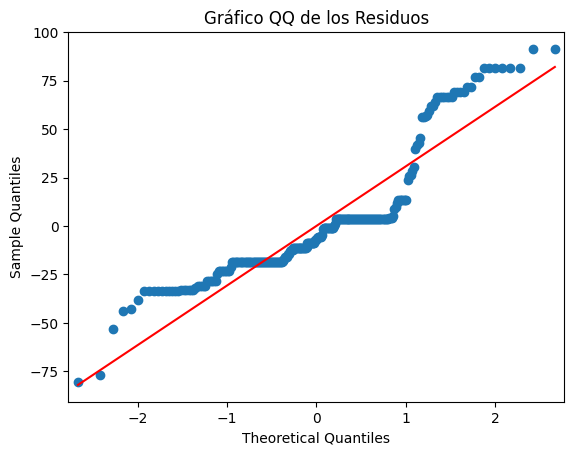

In [143]:
import plotly.graph_objects as go
import scipy.stats as stats

# Gráfico QQ de los residuos
fig = sm.qqplot(residuos, line='s')
plt.title('Gráfico QQ de los Residuos')
plt.show()

# Histograma de los residuos
hist_trace = go.Histogram(x=residuos, nbinsx=30, marker=dict(color='blue', line=dict(color='black', width=1)))
hist_fig = go.Figure(data=[hist_trace])
hist_fig.update_layout(title='Histograma de los Residuos', xaxis_title='Residuos', yaxis_title='Frecuencia')
hist_fig.show()

### Análisis de los supuestos

#### 1. Los errores son independientes
Test de Durbin-Watson:

$H_0$: No existe correlación entre los residuos.

$H_1$: Los residuos están autocorrelacionados.

In [144]:
from statsmodels.stats.stattools import durbin_watson


# Independence (Durbin-Watson Test)
dw_test = durbin_watson(residuos)

print(f'Test de Durbin-Watson: {dw_test}')

alpha = 0.5

# Interpretation
if 2 - alpha <= dw_test <= 2 + alpha:
    print("Los residuos no están correlacionados.")
elif dw_test > 2 + 0.5:
    print("Hay una autocorrelación positiva.")
else:
    print("Hay una autocorrelación negativa.")

Test de Durbin-Watson: 1.9961740876874094
Los residuos no están correlacionados.


Se cumple el primer supuesto. :heavy_check_mark:

#### 2. El valor esperado de los errores es cero

Test para la media de una población

$H_0$: $\mu _0 = 0$

$H_1$: $\mu _0 \neq 0$.

In [145]:
from scipy import stats

t_stat, p_value = stats.ttest_1samp(residuos, 0)

print(f"T-statistic: {t_stat:.5f}, P-value: {p_value:.5f}")

if p_value < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que la media de los residuos es cero.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que la media de los residuos es cero.")


T-statistic: -0.00000, P-value: 1.00000
No hay suficiente evidencia para rechazar la hipótesis nula de que la media de los residuos es cero.


Se cumple el segundo supuesto. :heavy_check_mark:

#### 3.  La Varianza del error aleatorio es constante

Test de Breusch-Pagan para determinar la Homocedasticidad de los residuos. 

$H_0$: La homocedasticidad está presente.

$H_1$: La homocedasticidad no está presente (es decir, existe heterocedasticidad)

In [146]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
import plotly.graph_objects as go


# Calcular los residuos estandarizados
residuos_estandarizados = residuos / np.std(residuos)

# Gráfico de residuos estandarizados contra recuentos
scatter_trace1 = go.Scatter(x=list(range(len(residuos_estandarizados))), y=residuos_estandarizados, mode='markers')
scatter_fig1 = go.Figure(data=[scatter_trace1])
scatter_fig1.update_layout(title='Residuos Estandarizados vs. Recuentos', xaxis_title='Recuentos', yaxis_title='Residuos Estandarizados')
scatter_fig1.show()

# Gráfico de residuos vs. valores ajustados
scatter_trace2 = go.Scatter(x=model.fittedvalues, y=residuos, mode='markers')
scatter_fig2 = go.Figure(data=[scatter_trace2])
scatter_fig2.update_layout(title='Residuos vs. Valores Ajustados', xaxis_title='Valores Ajustados', yaxis_title='Residuos')
scatter_fig2.show()


# Realizar el test de Breusch-Pagan
names = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

# Imprimir los resultados del test
print(lzip(names, test))

p_value = test[1]

if p_value < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que existe presencia de homocedasticidad.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que existe presencia de homocedasticidad.")

[('Lagrange multiplier statistic', 47.72832980956314), ('p-value', 1.0752234910242386e-09), ('f-value', 14.333900621924482), ('f p-value', 1.4358726172970454e-10)]
Hay evidencia para rechazar la hipótesis nula de que existe presencia de homocedasticidad.


No se cumple el tercer supuesto. :x:

#### 4. Los errores además son idénticamente distribuidos y siguen distribución normal con media cero y varianza constante

Test de Shapiro-Wilk (n < 30) o Normality Test (n >= 30).

$H_0$: Los datos siguen una distribución Normal 

$H_1$: Los datos no siguen una distribución Normal 

In [147]:
from scipy.stats import normaltest


media_residuos = np.mean(residuos)
suma_residuos = np.sum(residuos)

print(f"Media de los residuos: {media_residuos}")

if np.isclose(media_residuos, 0):
    print("La media de los residuos es cero.")
else:
    print("La media de los residuos no es cero.")

print(f"Suma de los residuos: {suma_residuos}")

if np.isclose(suma_residuos, 0):
    print("La suma de los residuos es cero.")
else:
    print("La suma de los residuos no es cero.")


_, norm_pvalue = normaltest(residuos)

print(f'Normality Test p-value: {norm_pvalue}')

if p_value < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que los valores siguen una distribución normal.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que los valores siguen una distribución normal.")

Media de los residuos: -2.0053702288490828e-13
La media de los residuos es cero.
Suma de los residuos: -5.213962595007615e-11
La suma de los residuos es cero.
Normality Test p-value: 3.212951552398871e-12
Hay evidencia para rechazar la hipótesis nula de que los valores siguen una distribución normal.


No se cumple el cuarto supuesto. :x:

#### 5. Las variables independientes del modelo no están correlacionadas.

Desde el análisis de la matriz de correlación podemos verificar el cumplimiento de este supuesto. :heavy_check_mark:   

No se cumplen los supuestos. :smiley:

## Análisis de Componentes Principales (PCA)

In [148]:
import plotly.graph_objects as go

from sklearn.decomposition import PCA

# Rellenar los valores NaN con la media de la columna
df_numeric_filled = df_numeric.fillna(df_numeric.mean())

# Normalizar
df_normalize = (df_numeric_filled - df_numeric_filled.mean()) / df_numeric_filled.std()

# Crear el objeto PCA
pca_breast = PCA()

# Ajustar y transformar los datos
pca_breast.fit_transform(df_normalize)

variance_ratio = pca_breast.explained_variance_ratio_

# Crear el gráfico de barras con Plotly
fig = go.Figure(data=go.Bar(x=np.arange(variance_ratio.shape[0]) + 1, y=variance_ratio))
fig.update_layout(title_text='Porciento de la varianza explicado por cada componente principal',
                  xaxis_title='Componente Principal',
                  yaxis_title='Porciento de la Varianza Explicada')
fig.show()

In [149]:
import plotly.graph_objects as go

cum_variance = pca_breast.explained_variance_ratio_.cumsum()

# Crear el gráfico de línea con Plotly
fig = go.Figure(data=go.Scatter(x=np.arange(variance_ratio.shape[0]) + 1, y=cum_variance, mode='markers+lines'))
fig.update_layout(title_text='Porciento acumulativo de la varianza explicada',
                  xaxis_title='Componente Principal',
                  yaxis_title='Porciento acumulativo de la Varianza Explicada',
                  showlegend=False)
fig.show()


Seleccionamos las 5 primeras componentes

In [150]:
component_count = 5
pca_breast = PCA(component_count)
principalComponents_breast = pca_breast.fit_transform(df_normalize)
principal_breast_Df = pd.DataFrame(data = principalComponents_breast)
analysis = pd.DataFrame(pca_breast.components_, columns=df_normalize.columns, index=[f'PC{i}' for i in range(1,component_count+1)]).T
analysis

,PC1,PC2,PC3,PC4,PC5
age,0.048446,-0.038549,0.500586,0.325555,-0.789320
type_of_injury_encoded,-0.301211,-0.120646,-0.005527,0.619639,0.206979
citizenship_encoded,-0.581716,-0.047147,-0.172256,-0.256789,-0.237196
event_location_district_encoded,-0.077498,0.698078,0.060115,0.034231,0.002159
gender_encoded,-0.226298,-0.037717,0.561504,-0.136272,0.396462
took_part_in_the_hostilities_encoded,-0.279910,-0.099902,0.557795,-0.056912,0.211708
place_of_residence_district_encoded,-0.094608,0.693854,0.058020,0.038600,0.010719
ammunition_encoded,-0.298852,0.005069,-0.244622,0.588338,0.110584
killed_by_encoded,0.578534,0.039516,0.162689,0.271123,0.252034


#### Presencia de cada característica en cada componente.

In [151]:
import plotly.figure_factory as ff

# Crear el heatmap con Plotly
fig = ff.create_annotated_heatmap(z=analysis.values, x=list(analysis.columns), y=list(analysis.index), colorscale='RdPu', showscale=True, zmin=-1, zmax=1)

# Eliminar las anotaciones de los valores
for i in range(len(fig.layout.annotations)):
    fig.layout.annotations[i].text = ''

fig.show()

## ANOVA (Análisis de la Varianza)

Queremos verificar si las medias de las edades se comportan igual para el caso de las muertes palestinas y las israelíes. Si obtenemos una respuesta negativa, reforzaría la hipótesis de que estamos analizando dos fenómenos distintos cuando estudiamos el comportamiento de las muertes en cada bando del conflicto.

#### Hipótesis para ANOVA

$H_0$: $\mu_0 = \mu_1 = ... = \mu_n$ donde $\mu_i$ es la media de la edad para diferentes `citizenship`.

$H_1$: Al menos una media μ es diferente de las demás.



In [152]:
# Rellenar los valores NaN en la columna 'age' con la media de los otros valores
df_filtered['age'].fillna(df_filtered['age'].mean(), inplace=True)

df_clean = df_filtered.dropna(axis=1)
df_clean = df_clean[df_clean['citizenship'].isin(['Palestinian', 'Israeli'])]

In [153]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ajusta el modelo ANOVA
modelo_anova = ols('age ~ citizenship', data=df_clean).fit()

# Realiza el análisis de varianza (ANOVA)
tabla_anova = sm.stats.anova_lm(modelo_anova, typ=2)

# Muestra la tabla ANOVA
print(tabla_anova)

                    sum_sq       df          F        PR(>F)
citizenship    7698.385181      1.0  90.020576  2.889459e-21
Residual     864245.532013  10106.0        NaN           NaN


Los resultados de la tabla ANOVA se interpretan de la siguiente manera:

- sum_sq: Esta es la suma de cuadrados. Para `citizenship`, es la variabilidad explicada por `citizenship`. Para Residual, es la variabilidad no explicada por `citizenship`.

- df: Este es el grado de libertad. Para `citizenship`, es el número de grupos menos 1. Para Residual, es el número total de observaciones menos el número de grupos.

- F: Este es el valor F, que es la razón entre la variabilidad explicada por `citizenship` y la variabilidad no explicada por `citizenship`. Un valor F grande sugiere que al menos uno de los grupos es significativamente diferente de los otros.

- PR(>F): Este es el valor p, que es la probabilidad de obtener un valor F tan grande o mayor si la hipótesis nula es verdadera (es decir, si todos los grupos son realmente iguales). Un valor p pequeño sugiere que se puede rechazar la hipótesis nula.

En este caso, el valor p para `citizenship` es extremadamente pequeño (1.600731e-09), lo que sugiere que hay una diferencia significativa en la edad entre las dos nacionalidades.

#### Análisis con prueba Post-hoc de Tukey
(No es necesario, pues solo se analizan 2 grupos)

In [154]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realiza la prueba post-hoc de Tukey
tukey_results = pairwise_tukeyhsd(endog=df_clean['age'], groups=df_clean['citizenship'], alpha=0.05)

# Muestra los resultados
print(tukey_results)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1    group2   meandiff p-adj  lower   upper  reject
---------------------------------------------------------
Israeli Palestinian  -3.3196   0.0 -4.0054 -2.6338   True
---------------------------------------------------------


#### Análisis de los supuestos

Supuestos:

- Las poblaciones de las que se extraen las muestras tienen distribuciones normales.
- Las poblaciones tienen varianzas iguales (homocedasticidad).
- Las muestras son independientes entre sí.

#### 1. Poblaciones normales. Test de Anderson-Darling para cada grupo.


$H_0$: Los datos siguen una distribución Normal 

$H_1$: Los datos no siguen una distribución Normal 

In [155]:
from scipy import stats

# Segmentar los datos por 'citizenship'
groups = df_filtered.groupby('citizenship')

# Obtener el nombre del primer grupo
first_group_name = list(groups.groups.keys())[0]

# Obtener los datos de 'age' para el primer grupo
first_group_data = groups.get_group(first_group_name)['age']

# Aplicar la prueba de Anderson-Darling a los datos de 'age' del primer grupo
result = stats.anderson(first_group_data)

print('Group1 - Anderson-Darling Test: Statistics=%.3f' % result.statistic)

for i in range(len(result.critical_values)):
    sl, cv = result.significance_level[i], result.critical_values[i]
    if result.statistic < cv:
        print('Probablemente normal a nivel de significancia %.1f%%' % sl)
    else:
        print('Probablemente no normal a nivel de significancia %.1f%%' % sl)

Group1 - Anderson-Darling Test: Statistics=9.185
Probablemente no normal a nivel de significancia 15.0%
Probablemente no normal a nivel de significancia 10.0%
Probablemente no normal a nivel de significancia 5.0%
Probablemente no normal a nivel de significancia 2.5%
Probablemente no normal a nivel de significancia 1.0%


No se cumple el primer supuesto. :x:

#### 2. Homogeneidad de los errores. Test de Levene

$H_0$: Igualdad de varianzas (Homocedasticidad)

$H_1$: Las varianzas son diferentes

In [156]:
from scipy import stats

# Segmentar los datos por 'citizenship'
groups = df_filtered.groupby('citizenship')

# Obtener los datos de 'age' para cada grupo
group_data = [groups.get_group(group)['age'] for group in groups.groups.keys()]

# Aplicar la prueba de Levene a los datos de 'age' de cada grupo
stat, p = stats.levene(*group_data)

print('Levene Test: Statistics=%.3f, p=%.3f' % (stat, p))

if p < 0.05:
    print("Hay evidencia para rechazar la hipótesis nula de que las varianzas son iguales.")
else:
    print("No hay suficiente evidencia para rechazar la hipótesis nula de que las varianzas son iguales.")

Levene Test: Statistics=80.364, p=0.000
Hay evidencia para rechazar la hipótesis nula de que las varianzas son iguales.


No se cumple el segundo supuesto. :x: 

#### 3. Independencia de las Observaciones. Test de Durbin-Watson

$H_0$: No existe correlación entre los residuos.

$H_1$: Los residuos están autocorrelacionados.

In [157]:
from statsmodels.stats.stattools import durbin_watson

# Obtener los datos de 'age' para el primer grupo
first_group_data = groups.get_group(first_group_name)['age']

# Calcula el estadístico de Durbin-Watson
dw = durbin_watson(first_group_data)

print(f"Estadístico de Durbin-Watson: {dw}")

alpha = 0.5

if 2 - alpha <= dw <= 2 + alpha:
    print("Los residuos no están correlacionados.")
elif dw > 2 + alpha:
    print("Hay una autocorrelación positiva.")
else:
    print("Hay una autocorrelación negativa.")

Estadístico de Durbin-Watson: 0.22883742368087082
Hay una autocorrelación negativa.


No se cumple el tercer supuesto. :x: 

No se cumplen los supuestos :smiley:


# Un poco de actualidad

#### El 7 de octubre de 2023 comenzó una nueva escalada en el conflicto israelí-palestino, con un ataque de las fuerzas de Hamas a Israel. El atque dejó 1200 muertos israelíes y sirvió como pretexto para que Israel comenzara a materializar un verdadero genocidio con su brutal ofensiva en el mayor campo de concentración al aire libre de la historia, la Franja de Gaza. 

#### Según un artículo de [elDiario](https://www.eldiario.es/internacional/radiografia-30-000-palestinos-muertos-gaza-12-500-ninos-8-000-mujeres_1_10952889.html), a 145 días del conflicto (finales de febrero de 2024), el número de muertos palestinos superaba los 30000. Entre las víctimas mortales hay más de 8.800 mujeres y 13.230 menores de edad, además de 340 trabajadores sanitarios y 132 periodistas.

#### La cantidad de muertes de menores de edad representaba el 42% del total, y la de mujeres el 29%.

#### Para poner los números en perspectiva, en 2 años de guerra en Ucrania, la cifra de fallecidos ha llegado a un acumulado de cerca de 10500 personas. La cifra de muertos en Gaza es 3 veces mayor y fue alcanzada en 5 meses. También es casi 3 veces mayor que la del mismo conflicto en los 24 años que analiza nuestro dataset.

#### Lo peor es que los números siguen creciendo.